Creating a first TF model

# Boston housing price preiction



In [4]:
pip install -U tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import tensorflow as tf
import tensorflow_addons as tfa

import numpy as np
print(tf.__version__)

from sklearn.datasets import load_boston
import pandas as pd
import tqdm
from tqdm.keras import TqdmCallback

import matplotlib.pyplot as plt
%matplotlib inline

2.8.2


In [6]:
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

### We have 13 numerical features

In [7]:
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


### Target is a median value of owner-occupied homes in $1000's

In [8]:
target = pd.DataFrame(boston.target)
target

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


### Scaling the data

In [9]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [10]:
ct = make_column_transformer(
    (MinMaxScaler(), df.columns)) # get all values between 0 and 1

ct.fit(df)

df = ct.transform(df)

df = pd.DataFrame(df)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


### Let's try just a simple model

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, target, 
                                                    test_size = 0.3, 
                                                    random_state = 2022)

In [19]:
# Printing a ssmile for each completed epoch
class PrintSmile(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 50 == 0: print('')
    print(':) ', end='')

In [32]:
tf.random.set_seed(2022)

model1 = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

model1.compile(optimizer = 'SGD',
               loss = 'mae',
               metrics = ['mae'], )

history1 = model1.fit(X_train, y_train, 
                      epochs = 100,
                      validation_split = 0.2,                       
                      verbose = 0,
                      callbacks=[PrintSmile()])


:) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) 
:) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) 

### Take a look on the model complexity

In [ ]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


### Look at the mean, median and std, to evaluate the result

In [21]:
target.mean(), target.median(), target.std()

(0    22.532806
 dtype: float64, 0    21.2
 dtype: float64, 0    9.197104
 dtype: float64)

In [22]:
model1.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 8.0001 - mae: 8.0001


[8.000101089477539, 8.000101089477539]

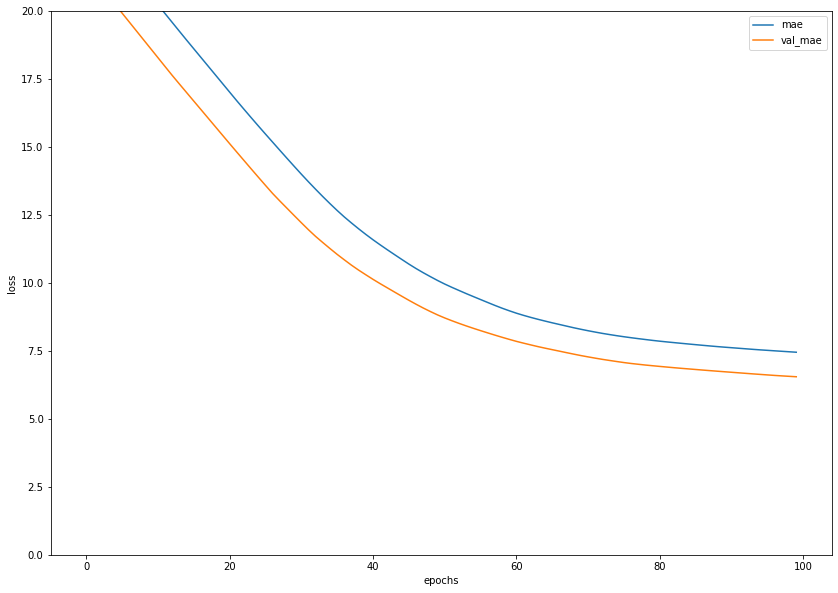

In [35]:
pd.DataFrame(history1.history)[['mae', 'val_mae']].plot(figsize = (14, 10))
plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim([0,20])
plt.show()

### Awful, let's move forward


### Add one Dense layer, change optimizer to Adam, change loss function to MSE, but keep a dispaying metrics as a MAE for intuitive peception.

In [36]:
model2 = tf.keras.Sequential([
                              tf.keras.layers.Dense(100),
                              tf.keras.layers.Dense(1)
])

model2.compile(optimizer = 'Adam',
               loss = 'mse',
               metrics = ['mae'])

history2 = model2.fit(X_train, y_train, 
                      epochs = 100,
                      validation_split = 0.2,                       
                      verbose = 0,
                      callbacks=[PrintSmile()])


:) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) 
:) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) 

In [37]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               1400      
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


In [38]:
model2.evaluate(X_test, y_test)

5/5 [==============================] - 0s 5ms/step - loss: 30.4491 - mae: 4.0960


[30.449077606201172, 4.095989227294922]

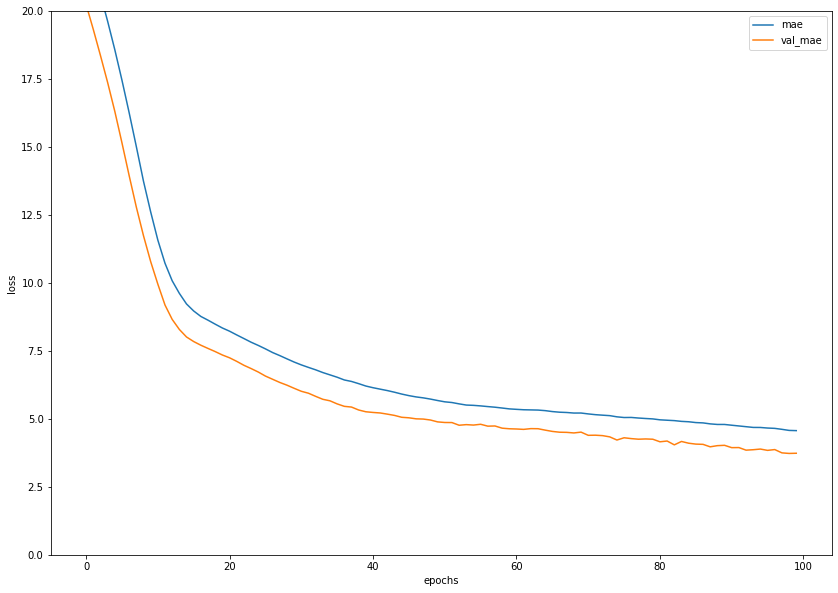

In [39]:
pd.DataFrame(history2.history)[['mae', 'val_mae']].plot(figsize = (14, 10))
plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim([0,20])
plt.show()

### Improved twice!

### Let's move on

### Add one more layer, set learning rate, increase to 1000 epochs

In [40]:
model3 = tf.keras.Sequential([
                              tf.keras.layers.Dense(100, activation = 'relu'),
                              tf.keras.layers.Dense(100, activation = 'relu'),
                              tf.keras.layers.Dense(1)
])

model3.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001),
               loss = 'mse',
               metrics = 'mae')

history3 = model3.fit(X_train, y_train, 
                      epochs = 1000,
                      validation_split = 0.2,                       
                      verbose = 0,
                      callbacks=[PrintSmile()])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)



:) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) 
:) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) 
:) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) 
:) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) 
:) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) 
:) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) 
:) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) 

In [41]:
model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               1400      
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 11,601
Trainable params: 11,601
Non-trainable params: 0
_________________________________________________________________


In [42]:
model3.evaluate(X_test, y_test, )

5/5 [==============================] - 0s 3ms/step - loss: 15.0944 - mae: 2.4126


[15.094411849975586, 2.4126250743865967]

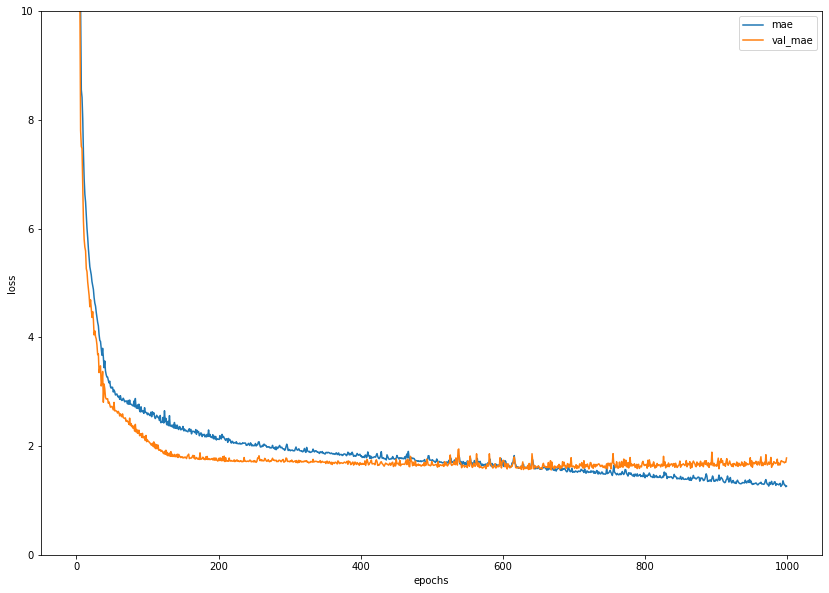

In [45]:
pd.DataFrame(history3.history)[['mae', 'val_mae']].plot(figsize = (14, 10))
plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim([0,10])
plt.show()

### Not bad at all

In [51]:
np.sqrt(15) #RMSE score

3.872983346207417

# Kaggle competition

In [58]:
model4 = tf.keras.Sequential([
                              tf.keras.layers.Dense(100, activation = 'relu'),
                              tf.keras.layers.Dense(100, activation = 'relu'),
                              tf.keras.layers.Dense(1)
])

model4.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001),
               loss = 'mse',
               metrics = 'mae')

model4.fit(df, target, 
                      epochs = 1200,                     
                      verbose = 0,
                      callbacks=[PrintSmile()])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)



:) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) 
:) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) 
:) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) 
:) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) 
:) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) 
:) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) 
:) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) 

In [62]:
kag = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Boston Kaggle data/test.csv')

In [64]:
kag = kag.drop('Unnamed: 0', axis = 1)

In [65]:
ct = make_column_transformer(
    (MinMaxScaler(), kag.columns)) # get all values between 0 and 1

ct.fit(kag)

kag = ct.transform(kag)

kag = pd.DataFrame(kag)
kag.columns = boston.feature_names
kag.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.002302,0.0,0.921221,0.0,0.386892,0.392719,0.923983,0.086437,0.043478,0.001908,0.773810,0.952305,0.427265
1,0.664969,0.0,0.636638,0.0,0.623679,0.398320,1.000000,0.041112,1.000000,0.914122,0.904762,1.000000,0.679909
2,0.187067,0.0,0.636638,0.0,0.456660,0.423309,0.840471,0.080513,1.000000,0.914122,0.904762,0.000000,0.580452
3,0.263401,0.0,0.636638,0.0,0.723044,0.455192,0.963597,0.096547,1.000000,0.914122,0.904762,0.978751,0.384681
4,0.003090,0.0,0.214851,0.0,0.105708,0.415984,0.357602,0.417116,0.086957,0.087786,0.630952,0.980957,0.187768


In [74]:
result = pd.DataFrame(model4.predict(kag))
result.index.name = 'ID'
result.columns = ['medv']
result

,medv
ID,
0,17.591391
1,5.527874
2,12.267591
3,11.412995
4,18.848177
...,...
97,19.903450
98,18.823217
99,17.870955


In [75]:
result.to_csv('boramorka_Submission.csv')

## KAGGLE RESULT
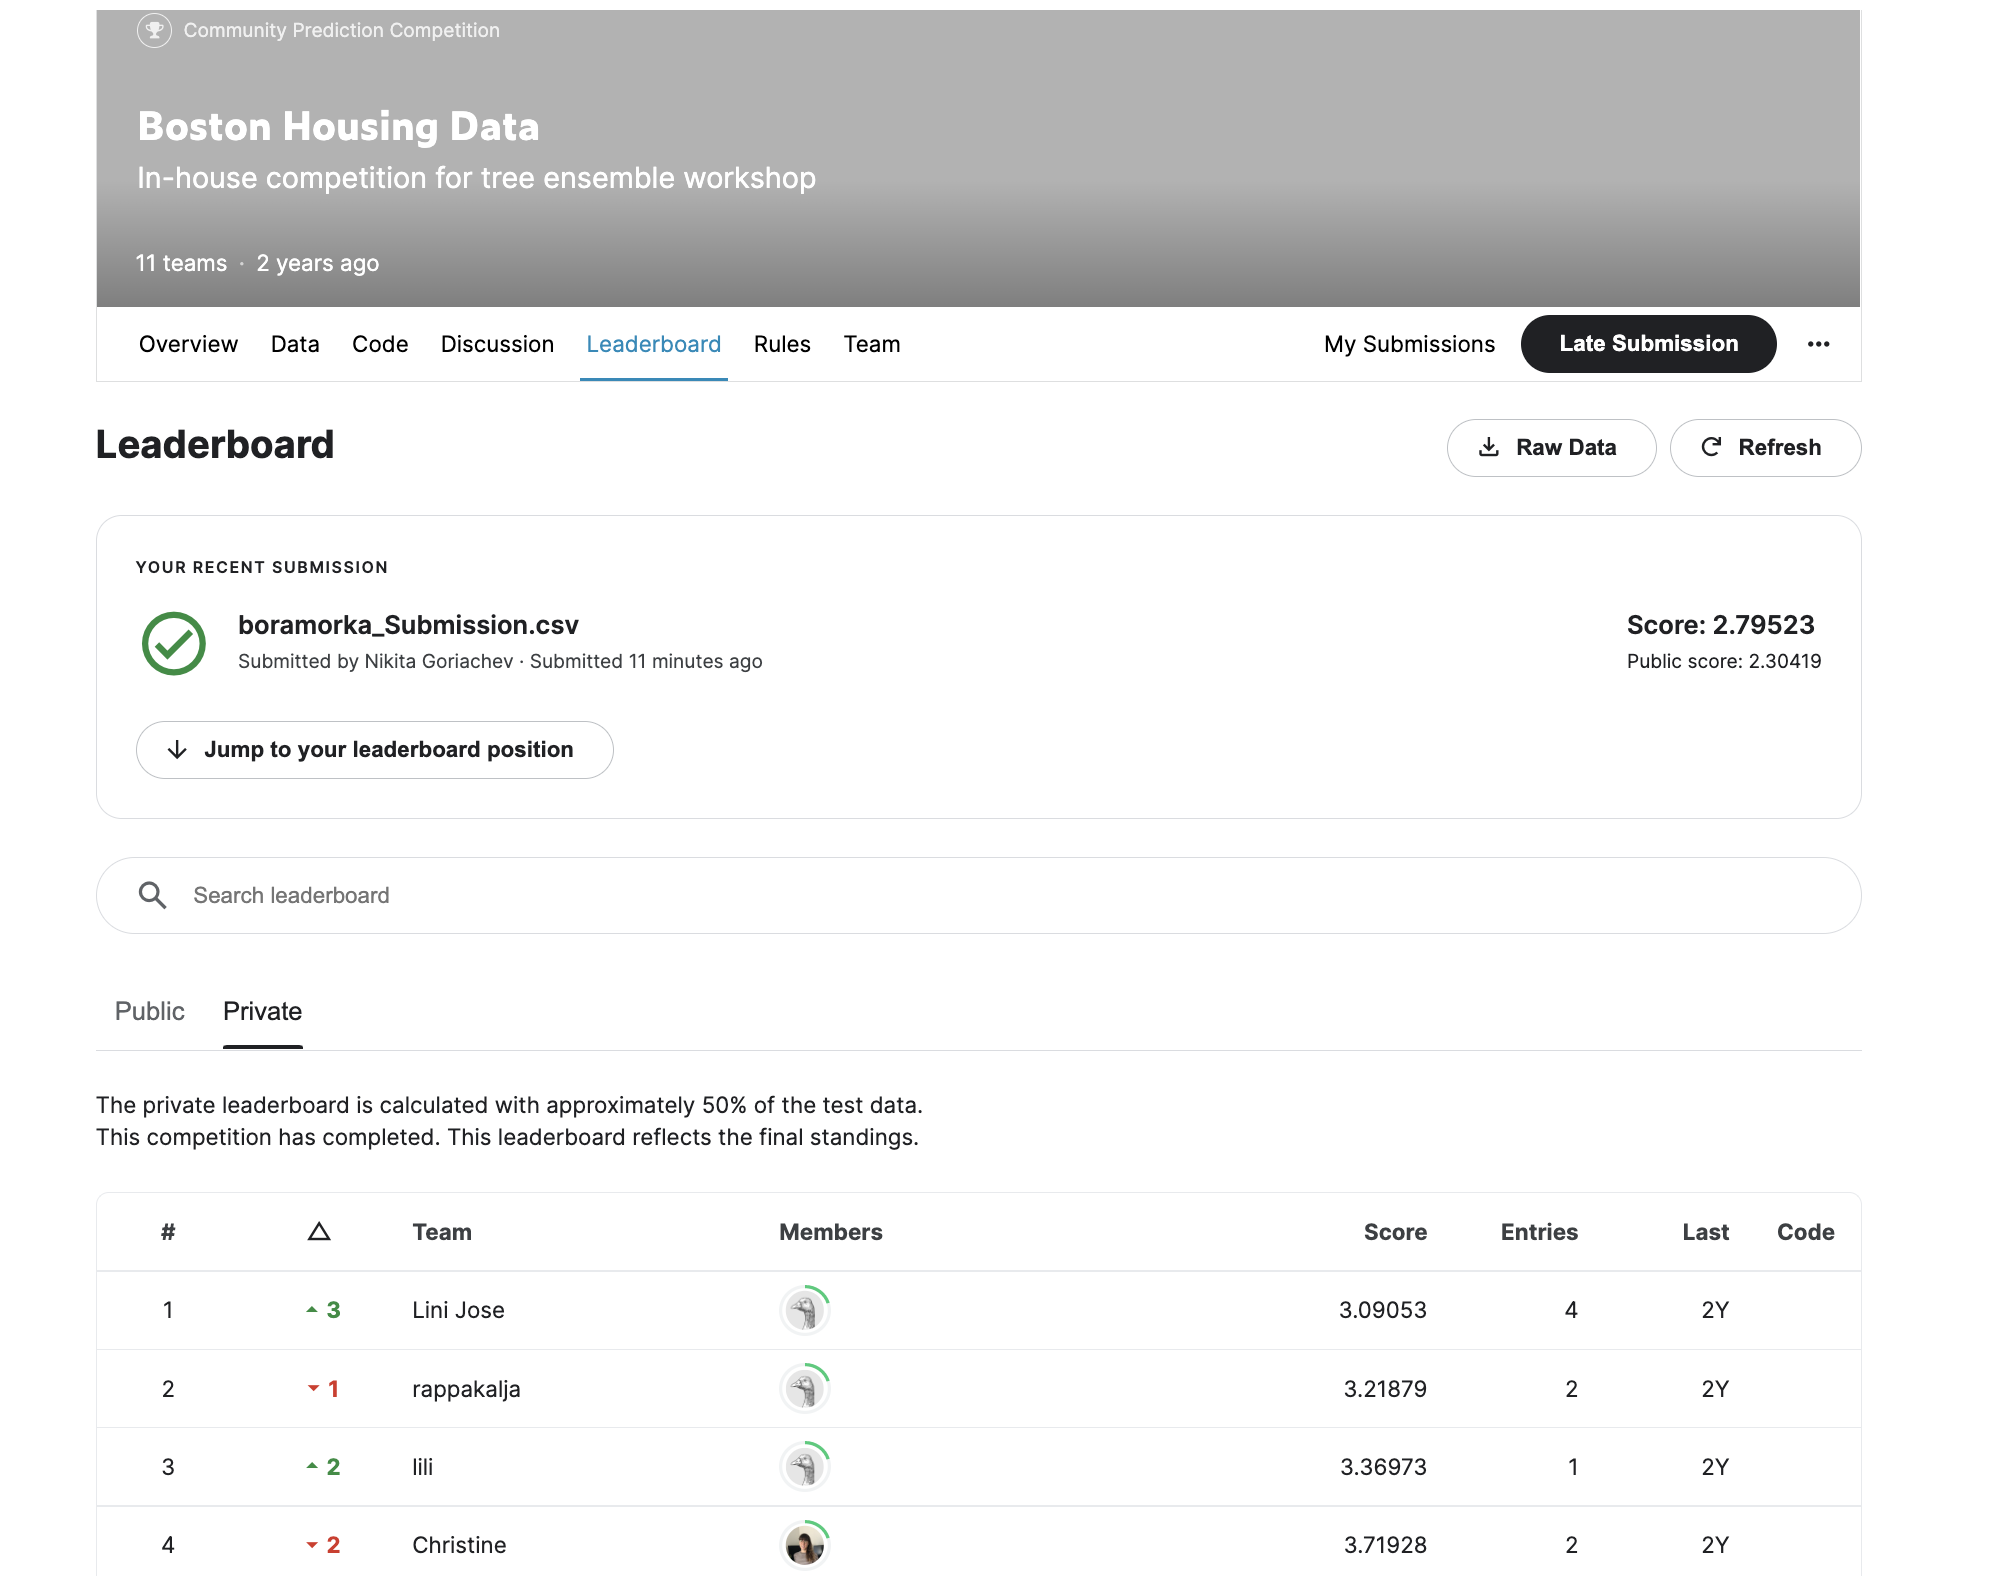